In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Define the paths to your dataset
data_dir = '/kaggle/input/project/DataSet_5(Final)'

In [4]:
# Create an ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training (80%) and validation (20%)
)

In [5]:
# Create an ImageDataGenerator for validation without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
# Load the training data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

Found 4669 images belonging to 7 classes.


In [7]:
# Load the validation data
validation_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 1164 images belonging to 7 classes.


In [8]:

# Load the VGG16 model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the base model
vgg16_base.trainable = False

# Create a new model on top
model_vgg16 = Sequential([
    vgg16_base,
    Flatten(),
    Dense(460, activation='relu'),
    Dropout(0.2),
    Dense(58, activation='relu'),
    Dense(188, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Compile the model
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the VGG16 model
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust the number of epochs based on your needs
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/145 ━━━━━━━━━━━━━━━━━━━━ 1:08:17 28s/step - accuracy: 0.0625 - loss: 2.0471

I0000 00:00:1718025104.461310     120 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718025104.483443     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 14/145 ━━━━━━━━━━━━━━━━━━━━ 4:30 2s/step - accuracy: 0.2694 - loss: 1.9204  

W0000 00:00:1718025131.356361     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.4867 - loss: 1.3681

W0000 00:00:1718025181.293253     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


145/145 ━━━━━━━━━━━━━━━━━━━━ 111s 576ms/step - accuracy: 0.4874 - loss: 1.3664 - val_accuracy: 0.7248 - val_loss: 0.7318
Epoch 2/10
  1/145 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.6875 - loss: 0.9816

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.6875 - loss: 0.9816 - val_accuracy: 0.5833 - val_loss: 0.9975
Epoch 3/10


W0000 00:00:1718025197.154205     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 293ms/step - accuracy: 0.6732 - loss: 0.8780 - val_accuracy: 0.8403 - val_loss: 0.4919
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7188 - loss: 1.0391 - val_accuracy: 0.8333 - val_loss: 0.3315
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 294ms/step - accuracy: 0.7286 - loss: 0.7444 - val_accuracy: 0.8359 - val_loss: 0.4603
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8125 - loss: 0.5152 - val_accuracy: 0.9167 - val_loss: 0.2188
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 298ms/step - accuracy: 0.7511 - loss: 0.6955 - val_accuracy: 0.8290 - val_loss: 0.4512
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7188 - loss: 0.7265 - val_accuracy: 0.8333 - val_loss: 0.4321
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 295ms/step - accuracy: 0.7533 - loss: 0.6671 - val_accuracy: 0.8733 - val_loss: 0.3832
Epoch 10/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8438 - loss: 0.4495 - val_ac

In [11]:
# Evaluate the VGG16 model
vgg16_loss, vgg16_acc = model_vgg16.evaluate(validation_generator)
print(f'VGG16 Validation Loss: {vgg16_loss}')
print(f'VGG16 Validation Accuracy: {vgg16_acc}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8706 - loss: 0.3620
VGG16 Validation Loss: 0.39513832330703735
VGG16 Validation Accuracy: 0.8599656224250793


In [12]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

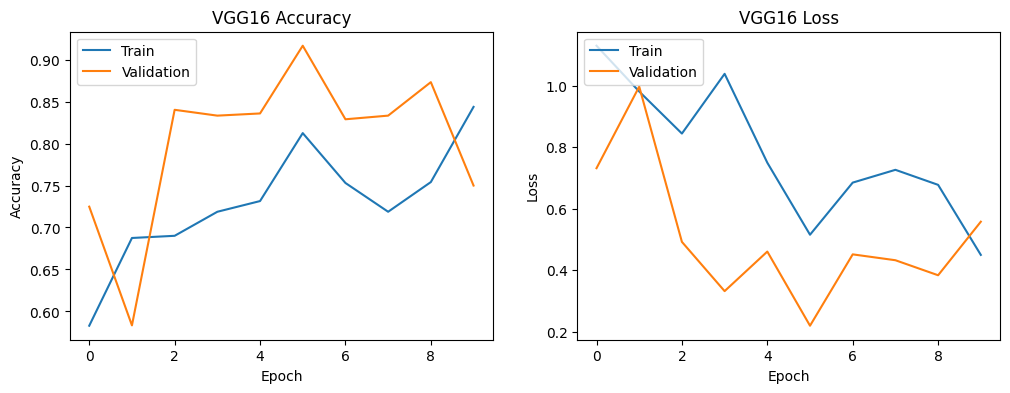

In [13]:
# Plot history for VGG16
plot_history(history_vgg16, 'VGG16')

In [14]:
# Save the VGG16 model
model_vgg16.save('vgg16_DS5(85.99%).h5')

In [16]:
model_vgg16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 460)            │     5,888,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 460)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 58)             │        26,738 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 188)            │        11,092 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,323 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,497,529 (123.97 MB)

 Trainable params: 5,927,613 (22.61 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 11,855,228 (45.22 MB)

In [ ]:
# Save the VGG16 model
model_vgg16.save('vgg16_DS5(82%).keras')